In [1]:
import copy
import csv
import os

import joblib
import numpy as np
import tensorflow as tf

from searchnets.nets import AlexNet
from searchnets.nets import VGG16
from searchnets.train import batch_generator
import searchnets.learncurve.test as learncurve_test
from searchnets.config import parse_config

In [2]:
pwd

'/home/bart/Documents/repos/L2M/visual-search-nets/docs/notebooks'

In [3]:
cd ../../data

/home/bart/Documents/repos/L2M/visual-search-nets/data


In [27]:
def rerun_learncurve_test(config_file):

    config = parse_config(config_file)

    gz_filename=config.data.gz_filename
    net_name=config.train.net_name
    number_nets_to_train=config.train.number_nets_to_train
    input_shape=config.train.input_shape
    new_learn_rate_layers=config.train.new_learn_rate_layers
    base_learning_rate=config.train.base_learning_rate
    new_layer_learning_rate=config.train.new_layer_learning_rate
    epochs_list=config.train.epochs_list
    train_size_list=config.learncurve.train_size_list
    batch_size=config.train.batch_size
    random_seed=config.train.random_seed
    model_save_path=config.train.model_save_path
    test_results_save_path=config.test.test_results_save_path
    dropout_rate=config.train.dropout_rate
    val_size=config.data.val_size

    data_dict = joblib.load(gz_filename)
    x_train = data_dict['x_train']
    y_train = data_dict['y_train']

    if type(epochs_list) is int:
        epochs_list = [epochs_list]
    elif type(epochs_list) is list:
        pass
    else:
        raise TypeError("'EPOCHS' option in 'TRAIN' section of config.ini file parsed "
                        f"as invalid type: {type(epochs_list)}")

    np.random.seed(random_seed)  # for shuffling in batch_generator
    tf.random.set_random_seed(random_seed)

    x_test = data_dict['x_test']
    y_test = data_dict['y_test']
    # make sure there's only one 'set' of set sizes
    set_sizes_by_stim_type = data_dict['set_sizes_by_stim_stype']
    set_sizes = []
    for stim_type, set_sizes_this_stim in set_sizes_by_stim_type.items():
        if set_sizes == []:
            set_sizes = set_sizes_this_stim
        else:
            if set_sizes_this_stim != set_sizes:
                raise ValueError('set sizes are not the same across visual search stimuli')
            else:
                continue

    set_size_vec_train = data_dict['set_size_vec_train']
    set_size_vec_test = data_dict['set_size_vec_test']

    learncurve_test(x_train, y_train, x_test, y_test, set_size_vec_train, set_size_vec_test,
             net_name, number_nets_to_train, set_sizes, input_shape, new_learn_rate_layers, epochs_list, train_size_list,
             batch_size, model_save_path, test_results_save_path)

In [ ]:
config_file = './configs/searchnets_alexnet_learncurve_2_v_5.ini'

In [ ]:
config_file = './configs/searchnets_alexnet_learncurve_RVvRHGV.ini'
rerun_learncurve_test(config_file)

## learning curve plots

In [1]:
import searchnets.plot

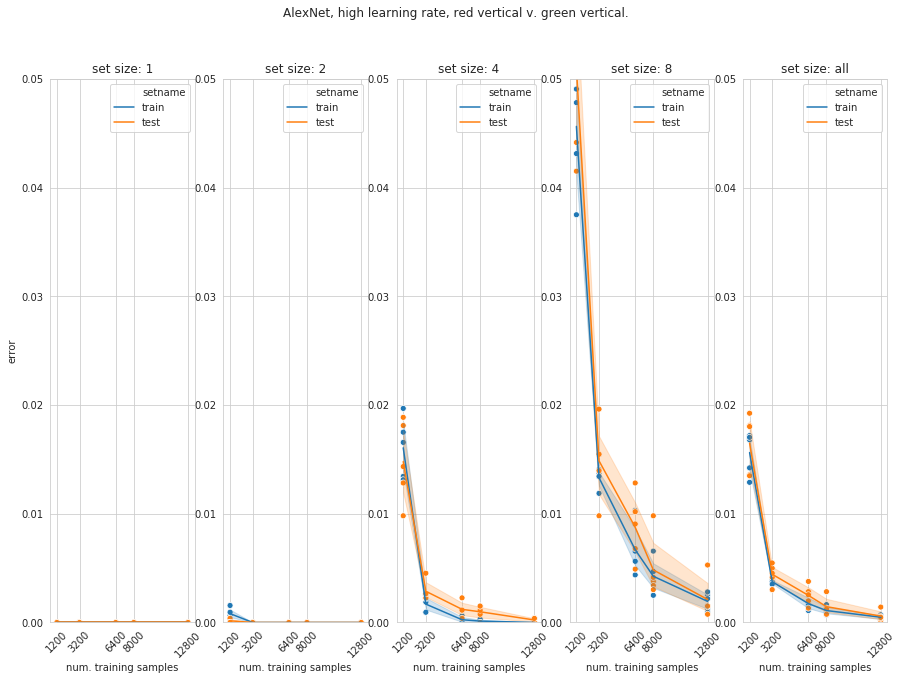

In [12]:
csv_fname = '/home/bart/Documents/repos/L2M/visual-search-nets/data/results/alexnet_learncurve_RVvGV/learncurve_alexnet.csv'
searchnets.plot.figures.learncurve(csv_fname, ylim=(0, 0.05), 
                                   suptitle='AlexNet, high learning rate, red vertical v. green vertical.',
                                   save_as='alexnet_highLR_RVvGV')

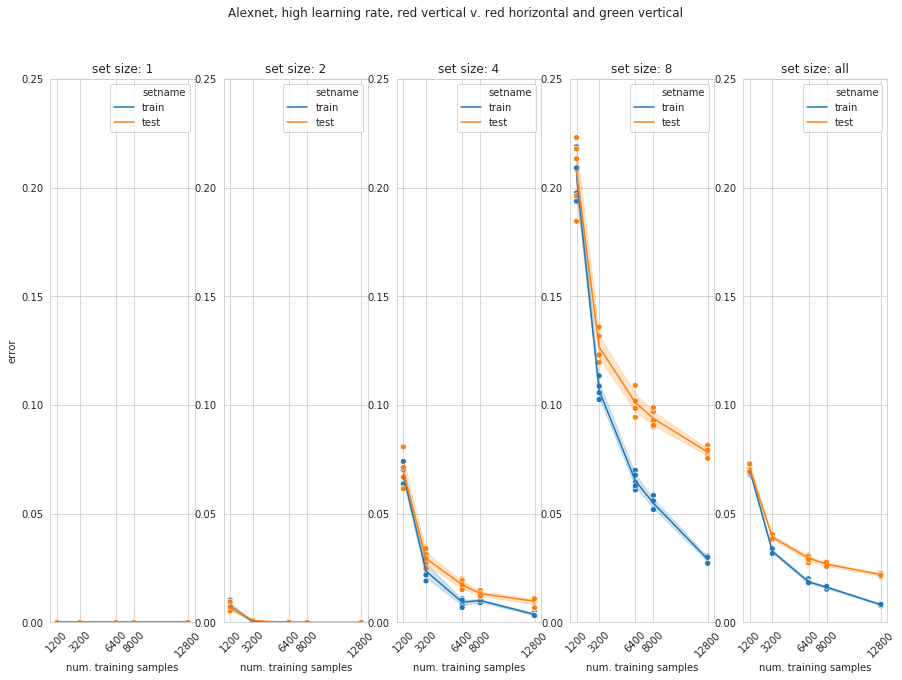

In [14]:
csv = '/home/bart/Documents/repos/L2M/visual-search-nets/data/results/alexnet_learncurve_RVvRHGV/learncurve_alexnet.csv'
searchnets.plot.figures.learncurve(csv, ylim=(0, 0.25), 
                                   suptitle='Alexnet, high learning rate, red vertical v. red horizontal and green vertical', 
                                   save_as='alexnet_highLR_RVvRHGV')

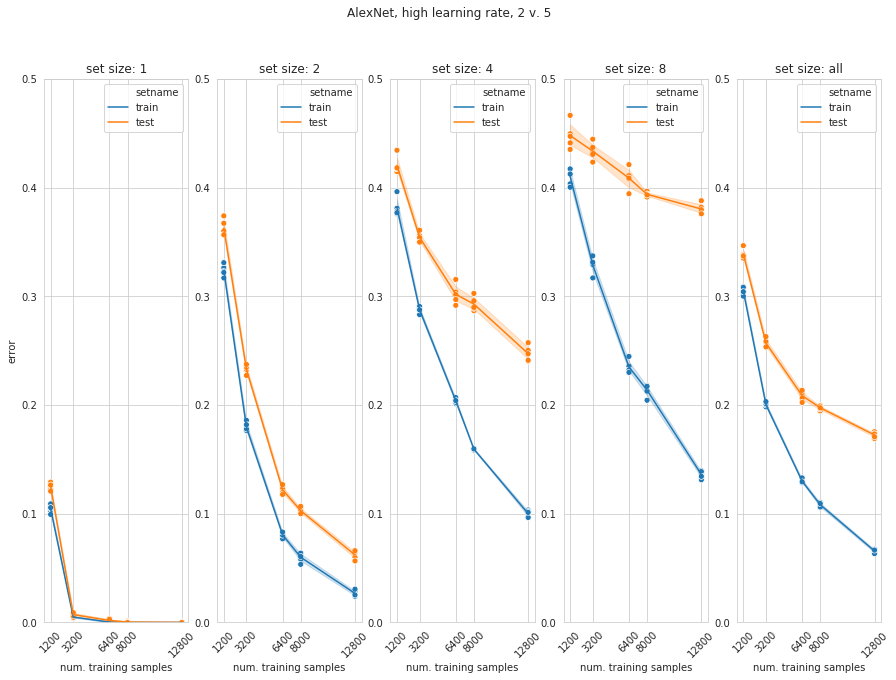

In [15]:
csv_fname = '/home/bart/Documents/repos/L2M/visual-search-nets/data/results/alexnet_learncurve_2_v_5/learncurve_alexnet.csv'
searchnets.plot.figures.learncurve(csv_fname, ylim=(0, 0.5), 
                                   suptitle='AlexNet, high learning rate, 2 v. 5',
                                   save_as='alexnet_highLR_2_v_5')